### Problem statement:
- You are given a dataset that consist of city population and profit of a resturant in a city.
- Your goal is to predict which city can profit your resturant the most if you move there.

In [39]:
# Import lilbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
data = pd.read_csv("LR data.csv", header=None)

# Split data into X and y actual set
x = data.iloc[:, 0]  # First column
y = data.iloc[:, 1]  # Second column

# Split data into X and y training set
x_train = data.iloc[:, 0]  # First column
y_train = data.iloc[:, 1]  # Second column

### Checking parameters:

In [40]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'pandas.core.series.Series'>
First five elements of x_train are:
 0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: 0, dtype: float64


- 5.5277 means 55,277 city populations

In [41]:
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'pandas.core.series.Series'>
First five elements of y_train are:
 0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: 1, dtype: float64


- 9.1302 means $91,302 in average monthly profit for that city.

In [42]:
# Dimensions:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


- This means total city population and monthly average profits have 97 data points. 

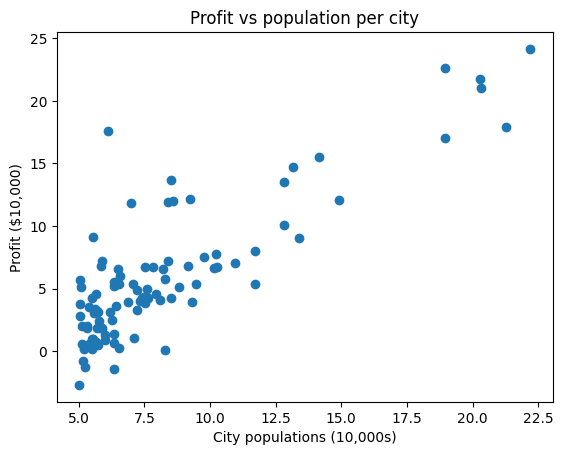

In [43]:
# Visualize Graph
plt.scatter(x_train, y_train)
plt.title("Profit vs population per city")
plt.ylabel("Profit ($10,000)")
plt.xlabel("City populations (10,000s)")
plt.show()

### Building Model 
- **Linear regression model:** $f_{w,b}(x) = wx + b$
    - Where:
        - $f_{w,b}(x)$ is predicted value for a given input $x$.
        - $w$ is **weight** of model.
        - $b$ is **bias** of model.
    - To find best optimal $w$ and $b$ parameters / values:
        - Use **Gradient descent formula** to find lowest cost function $J(w, b)$.
            - Lowest cost $J(w, b)$ = difference between predicted values and the actual target values in the dataset.
                - Lower cost = higher model accuracy.
- **Required steps:**
    - **Step 1:** Find Cost function: $J(w, b)$
    - **Step 2:** Find gradient: $\frac{\partial J(w, b)}{\partial w}$ & $\frac{\partial J(w, b)}{\partial b}$
    - **Step 3:** Find gradient descent: 

        - $w:= w-n\frac{\partial J(w, b)}{\partial w}$ 

        - $b:= b-n\frac{\partial J(w, b)}{\partial b}$
            - Loop iterations to update $w$ and $b$ using gradient descent to find lowest cost function.
       


#### Step 1: Compute Cost function formula
- The formula (**Mean Squared Error** (MSE)) is defined as: 
$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$

- where:
    - (1) $m$ = number of training examples
    - (2) $\sum\limits_{i = 0}^{m-1}$ = sum up an expression over a range of values for i.
        - The index $i$ starts from 0 and goes up until it reaches $m - 1$.
    - (3) $f_{w,b}(x^{(i)})$ = prediction for the i-th training example.
        - It is defined as: $wx^{(i)} + b$ 
    - (4) $y^{(i)}$ = actual target value for i-th training example.

- This formula evaluates how well the linear regression model fits the data.

In [44]:
# Step 1: Find Cost function J(w,b)

def compute_cost(x, y, w, b):
    # number of training examples 
    m = x.shape[0] 

    # Initlize values
    total_cost = 0
    cost = 0

    # Finding lowest cost J(w, b)
    for i in range(m): #(2) - sum up expression until it reaches "m - 1"
        f_wb = w*x[i]+b # (3) - prediction for i-th training example
        cost += (f_wb - y[i])**2

    total_cost = cost/(2*m) # <- J(w, b)

    return total_cost # <- J(w, b)

# testing Compute cost 
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')

Cost at initial w: 75.203


#### Step 2: Compute gradient formula

- The formula is defined as:

    - $\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) x^{(i)}$


    - $\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)$

- where:
    - $f_{w,b}(x^{(i)})$ = prediction for the i-th training example.
        - It is defined as: $wx^{(i)} + b$ 


In [45]:
# Step 2: Find gradient formula: 

def compute_gradient(x, y, w, b):
    m = x.shape[0] # total training examples

    # Initlize
    dj_dw = 0
    dj_db = 0

    ### START CODE HERE ###
    for i in range(m):
        e=(w*x[i]+b)-y[i]
        dj_dw+=e*x[i]
        dj_db+=e
    dj_dw/=m
    dj_db/=m

    return dj_dw, dj_db


# testing with zero:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [46]:
# Run gradient descent on our train dataset with non-zero
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)



Gradient at test w, b: -47.41610118114435 -4.007175051546391


#### Step 3: Compute gradient descent formula

- The formula is defined as:
    - $w:= w-n\frac{\partial J(w, b)}{\partial w}$ 

    - $b:= b-n\frac{\partial J(w, b)}{\partial b}$

- where:
    - $:=$ indicates **re-assigning values** during an update loop
    - $n$ indicates learning rate

In [47]:
def gradient_descent(x, y, w_in, b_in, compute_cost, compute_gradient, n, iterations):
    m = x.shape[0] # total num of training data points

    # Store cost J and w's at each iteration to visulize outcome  
    J_history = []
    w_history = []
    w = w_in  #avoid modifying global w within function
    b = b_in

    for i in range(iterations):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - n * dj_dw               
        b = b - n * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  compute_cost(x, y, w, b)
            J_history.append(cost)

        # Uncomment below to print cost every at intervals 10 times or as many iterations if < 10
        # if i% math.ceil(iterations/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [48]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1000
n = 0.008

w,b, J_history, w_history = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, n, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     8.97   
Iteration    1: Cost     6.27   
Iteration    2: Cost     5.95   
Iteration    3: Cost     5.90   
Iteration    4: Cost     5.90   
Iteration    5: Cost     5.89   
Iteration    6: Cost     5.89   
Iteration    7: Cost     5.88   
Iteration    8: Cost     5.88   
Iteration    9: Cost     5.87   
Iteration   10: Cost     5.87   
Iteration   11: Cost     5.87   
Iteration   12: Cost     5.86   
Iteration   13: Cost     5.86   
Iteration   14: Cost     5.85   
Iteration   15: Cost     5.85   
Iteration   16: Cost     5.85   
Iteration   17: Cost     5.84   
Iteration   18: Cost     5.84   
Iteration   19: Cost     5.84   
Iteration   20: Cost     5.83   
Iteration   21: Cost     5.83   
Iteration   22: Cost     5.82   
Iteration   23: Cost     5.82   
Iteration   24: Cost     5.82   
Iteration   25: Cost     5.81   
Iteration   26: Cost     5.81   
Iteration   27: Cost     5.80   
Iteration   28: Cost     5.80   
Iteration   29: Cost     5.80   
Iteration 

##### Visualize Gradient Descent:

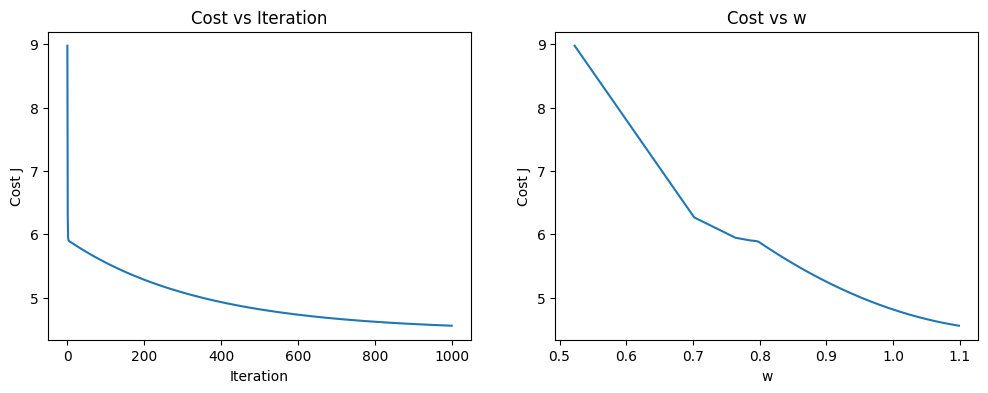

In [49]:
def plot_cost_i_w(J_history, w_history):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))

    ax[0].plot(J_history)
    ax[0].set_xlabel("Iteration")
    ax[0].set_ylabel("Cost J")
    ax[0].set_title("Cost vs Iteration")

    ax[1].plot(w_history, J_history)
    ax[1].set_xlabel("w")
    ax[1].set_ylabel("Cost J")
    ax[1].set_title("Cost vs w")

    plt.show()
plot_cost_i_w(J_history, w_history)

- Lower cost = higher accuracy.
- Since model has reach _Convergence_, it has found the lowest possible cost $J(w, b)$.
    - _Convergence_ occurs when cost $J(w, b)$ does not showed any significant changes after iterations. 
- So given inputs iterations = 1000 & n = 0.008, best linear regression model is: 
    - $y=1.099⋅x−2.957$

In [50]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'City Population (10,000s)')

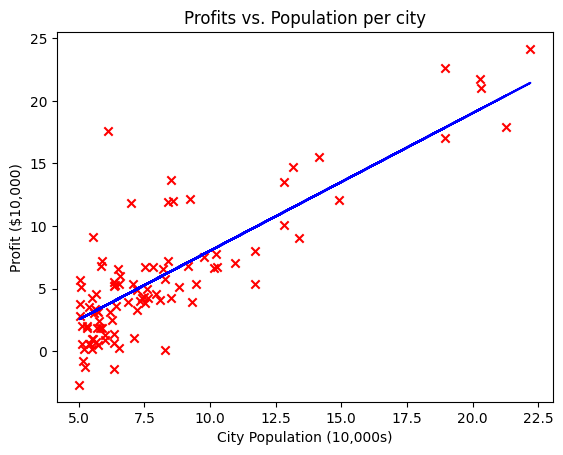

In [51]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit ($10,000)')
# Set the x-axis label
plt.xlabel('City Population (10,000s)')

In [52]:
# Create user input 
print("Input a number from 0 - 22.5 indicated at the top bar:")
print("Press ESC to exit program.")
bool = True

while bool:
    # Population input
    user_input = float(input("Enter the population (E.g input of 3.5 = 3500): "))
    if 0 <= user_input <= 100:
        predict = user_input * w + b
        print('For %d populations, we predict a profit of $%.2f' % (user_input*10000, predict*10000))
    else:
        print("Please input a number from 0 to 100,000:")

Input a number from 0 - 22.5 indicated at the top bar:
Press ESC to exit program.
Please input a number from 0 to 100,000:
For 1000000 populations, we predict a profit of $1069135.15
For 10000 populations, we predict a profit of $-18581.00
For 35000 populations, we predict a profit of $8886.58
For 70000 populations, we predict a profit of $47341.19
For 100000 populations, we predict a profit of $80302.28


ValueError: could not convert string to float: ''

- In conclusion, there is a positive correlation between the population size of a city and the profits gained by restaurants in that city. Generally, as the population increases, restaurant profits increase as well.